Dataset Loaded Successfully!
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
Model Accuracy: 99.32%


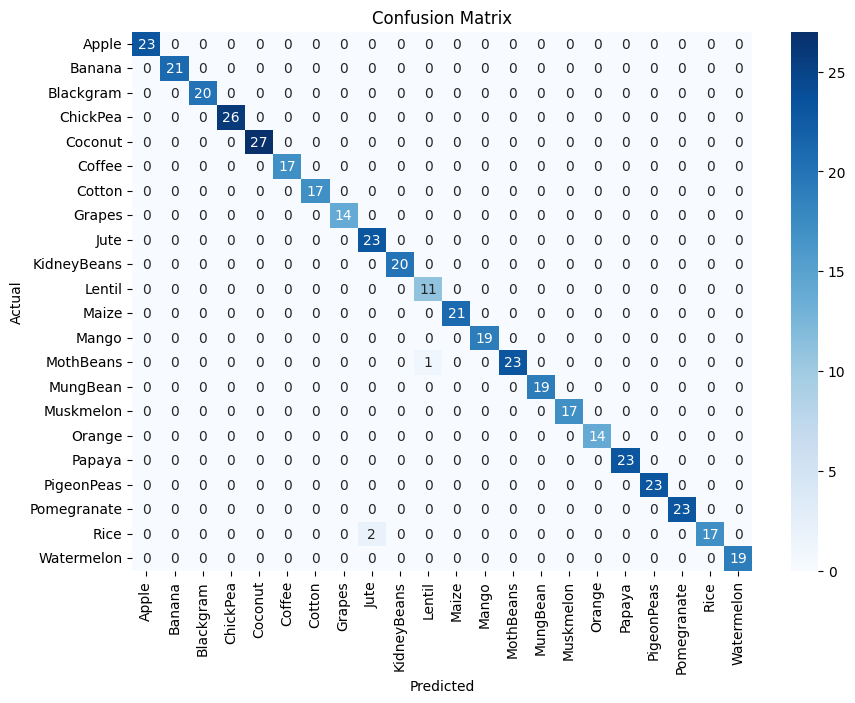

Model saved successfully at D:\vs-code\EPICS AgroAid\training_data\crop_recommendation_model.pkl!


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

# Load the dataset
file_path = r"D:\vs-code\EPICS AgroAid\datasets\Crop_Recommendation.csv"
crop_data = pd.read_csv(file_path)

# Ensure the dataset loaded correctly
print("Dataset Loaded Successfully!")
print(crop_data.head())

# Split the dataset into features and target
X = crop_data.drop(columns=['Crop'])  # Assuming 'Crop' is the target column
y = crop_data['Crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model in the training_data/ directory
save_dir = r"D:\vs-code\EPICS AgroAid\training_data"
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists
model_file_path = os.path.join(save_dir, "crop_recommendation_model.pkl")

with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully at {model_file_path}!")
